# Práctica 4: Análisis de Ventas

Con un dataset de ventas de tiendas vamos a intentar encontrar cuales son las tiendas que históricamente más han vendido. Para esto intentaremos hacer un gráfico de Líneas con las ventas por mes del TOP 5 de las tiendas. Resaltaremos en este gráfico una tienda que tiene un comportamiento interesante.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0


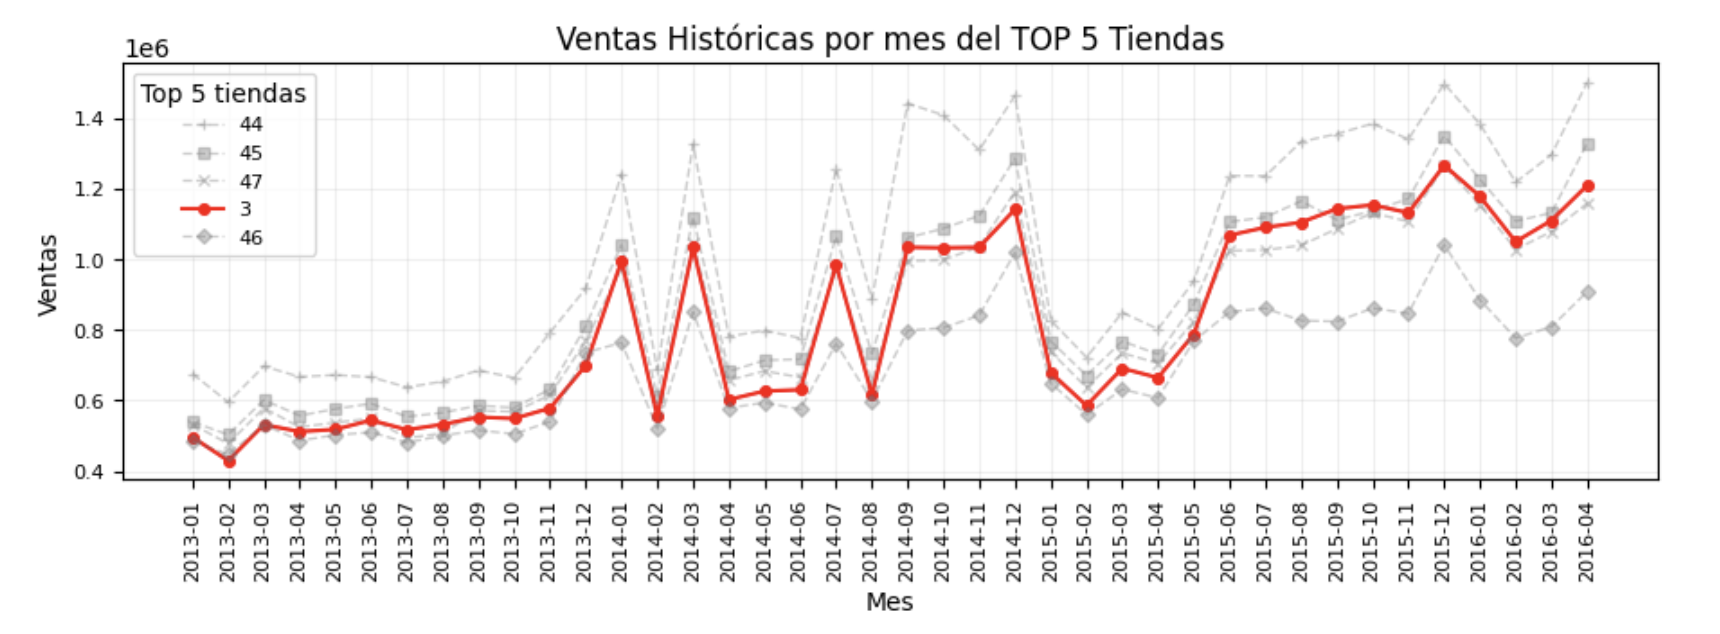

In [3]:
# Creamos una columna para tener el mes
df['mes'] = df['date'].apply(lambda x: x[:7])
df

,id,date,store_nbr,family,sales,onpromotion,mes
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04


In [4]:
# Cuantas tiendas unicas tenemos?
len(df['store_nbr'].unique())

54

In [5]:
# Me interesa saber como ha sido historicamente la venta de las tiendas
agrupado_tiendas = df.groupby('store_nbr').agg({
    'sales': 'sum'
})
agrupado_tiendas

,sales
store_nbr,
1,9.181626e+06
2,1.410272e+07
3,3.267186e+07
4,1.247039e+07
5,1.087617e+07
6,1.655468e+07
7,1.720570e+07
8,1.975790e+07
9,1.752849e+07


In [6]:
# Puedo hacer un df.describe() para darme una idea de los estadísticos descriptivos de las ventas
agrupado_tiendas.describe()

,sales
count,5.400000e+01
mean,1.269988e+07
std,8.858355e+06
min,0.000000e+00
25%,7.091574e+06
50%,1.063859e+07
75%,1.625086e+07
max,4.063205e+07


Notemos que el mínimo es 0. A mayor inspección veo que hay una tienda que tiene 0 ventas. A esta tienda podríamos quitarla del análisis con un `.drop(index=52)` en el dataframe agregado o con un filtrado en el dataframe original.   

Analizar o no esta tienda va a depender de nuestros objetivos. Pero en lo personal, preferiría quitarla ya que va a dañar nuestros estadísticos descriptivos. La media, desviacion estandar, el diagrama de cajas, todo se verá afectado por esta tienda.

<Axes: >

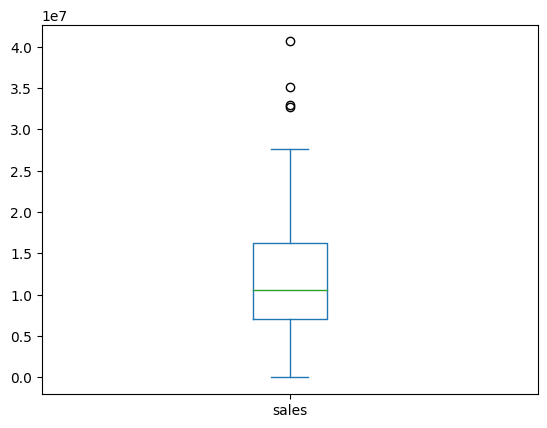

In [7]:
# Puedo hacer un diagrama de cajas para ver mejor estos datos
agrupado_tiendas.plot.box()

<Axes: ylabel='Frequency'>

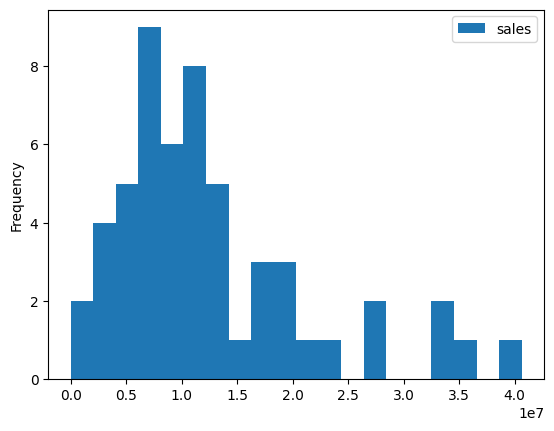

In [8]:
# O un histograma para ver la distribución de ventas historicas de cada tienda
agrupado_tiendas.plot.hist(bins=20)

In [9]:
# Ahora me interesa saber como se comparan las tiendas entre ellas
# Cuales tiendas han vendido mas?
agrupado_tiendas.sort_values('sales', ascending=False)

,sales
store_nbr,
44,4.063205e+07
45,3.511369e+07
47,3.292287e+07
3,3.267186e+07
46,2.766196e+07
49,2.645239e+07
48,2.392486e+07
51,2.179748e+07
8,1.975790e+07


In [10]:
# Este es mi top 5, lo puedo poner manualmente en una lista o cogerlo directo de los primeros 5 indices
top_5_tiendas = [44, 45, 47, 3, 46]

Que mejor manera de analizar históricamente estas 5 tiendas que con un gráfico de líneas donde por mes pueda ver cuanto ha vendido cada tienda?

In [11]:
# Filtraremos el DataFrame original solo con estas tiendas
df_top_5 = df[df['store_nbr'].isin(top_5_tiendas)]
df_top_5

,id,date,store_nbr,family,sales,onpromotion,mes
726,726,2013-01-01,3,AUTOMOTIVE,0.000,0,2013-01
727,727,2013-01-01,3,BABY CARE,0.000,0,2013-01
728,728,2013-01-01,3,BEAUTY,0.000,0,2013-01
729,729,2013-01-01,3,BEVERAGES,0.000,0,2013-01
730,730,2013-01-01,3,BOOKS,0.000,0,2013-01
...,...,...,...,...,...,...,...
2161165,2161165,2016-04-30,47,POULTRY,1687.844,1,2016-04
2161166,2161166,2016-04-30,47,PREPARED FOODS,431.271,0,2016-04
2161167,2161167,2016-04-30,47,PRODUCE,7533.308,1,2016-04
2161168,2161168,2016-04-30,47,SCHOOL AND OFFICE SUPPLIES,11.000,0,2016-04


In [12]:
# Agrupo por tienda y por mes
top_5_por_mes = df_top_5.groupby(['store_nbr', 'mes']).agg({'sales': 'sum'})
top_5_por_mes

sales
store_nbr mes                  
3         2013-01  4.965743e+05
          2013-02  4.296186e+05
          2013-03  5.316862e+05
          2013-04  5.120721e+05
          2013-05  5.181973e+05
...                         ...
47        2015-12  1.264874e+06
          2016-01  1.154481e+06
          2016-02  1.028481e+06
          2016-03  1.078566e+06
          2016-04  1.158896e+06

[200 rows x 1 columns]

In [13]:
# Pongo el indice como columna para poder usar seaborn
top_5_por_mes = top_5_por_mes.reset_index()
top_5_por_mes

,store_nbr,mes,sales
0,3,2013-01,4.965743e+05
1,3,2013-02,4.296186e+05
2,3,2013-03,5.316862e+05
3,3,2013-04,5.120721e+05
4,3,2013-05,5.181973e+05
...,...,...,...
195,47,2015-12,1.264874e+06
196,47,2016-01,1.154481e+06
197,47,2016-02,1.028481e+06
198,47,2016-03,1.078566e+06


In [14]:
# Quitando un elemento de alguna de las categorias no es problema, el punto se ignora en el grafico
top_5_por_mes = top_5_por_mes.drop(index=118)

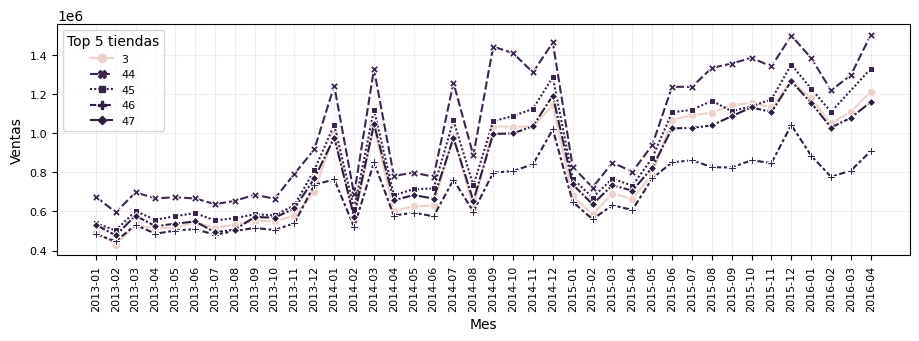

In [15]:
# Veamos graficamente el historico de ventas de estas tiendas...

ax = sns.lineplot(
    data = top_5_por_mes,
    x = 'mes',
    y = 'sales',
    hue='store_nbr',
    style = "store_nbr",
    markers = True,
    # palette='Set1' # Cambiando la paleta tampoco arreglamos el problema
)

# Otra forma de solamente cambiar la rotacion de las etiquetas sin definirlas
ax.tick_params(
    axis='x', 
    labelrotation = 90,
    labelsize = 8
)

ax.tick_params(
    axis='y', 
    labelsize = 8
)

ax.grid(
    visible=True,
    axis='x',
    alpha=0.2
)

ax.grid(
    visible=True,
    axis='y',
    alpha=0.2
)

ax.legend(
    title='Top 5 tiendas',
    bbox_to_anchor=(0, 1), 
    fontsize=8,
    loc='upper left'
)

ax.set_ylabel('Ventas')
ax.set_xlabel('Mes')

# Otra forma de cambiar el tamaño de una figura cuando solo partimos de un ax
fig = ax.get_figure()
fig.set_size_inches(11, 3)

La tienda número 3 a pesar de ser la 4ta en el top, en los últimos meses pareciera tener un crecimiento por sobre la tienda en el top 3 (tienda 47)

Sin embargo, este comportamiento interesante de la tienda 3 queda opacado por los colores del gráfico de líneas. Me gustaría de alguna forma resaltar solo la tienda 3.   


Podemos hacerlo? 
Si, pero no con seaborn. En este punto nos conviene utilizar directamente matplotlib para tener un nivel de personalización mas alto.   


Vamos a intentar hacer que solo la tienda 3 resalte por sobre el resto. Para esto le daremos un estilo totalmente personalizado a cada tienda. Para esto podemos hacer algo denominado **graficación iterativa**, en donde dentro de un lazo `for` vamos a ir dibujando en el gráfico.

In [16]:
top_5_tiendas

[44, 45, 47, 3, 46]

In [17]:
# Puedo manejar los estilos en un diccionario que tenga como claves las categorias (tiendas) y como valor 
# los estilos de las líneas que quiero que tenga cada tienda en el siguiente orden: 
# [color, opacidad, marcador, estilo de linea, ancho de linea]
estilos_por_tienda = {
    44: ['grey', 0.4, '+', '--', 1],
    45: ['grey', 0.4, 's', '--', 1],
    47: ['grey', 0.4, 'x', '--', 1],
    3:  ['red', 1, 'o', '-', 1.5],
    46: ['grey', 0.4, 'D', '--', 1]
}

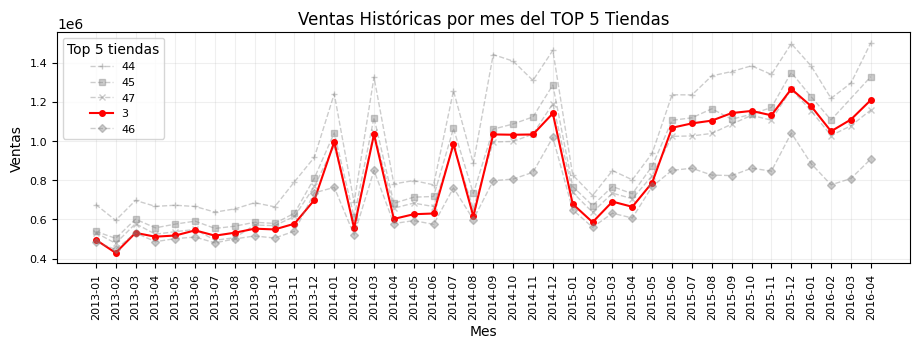

In [18]:
# Creo un canvas vacio
fig2, ax2 = plt.subplots()

# Itero sobre mis tiendas
for tienda in top_5_tiendas:
    # Obtengo el estilo de esa tienda
    estilos = estilos_por_tienda[tienda]
    # Filtro el dataframe con la tienda que estoy iterando actualmente
    df_tmp = top_5_por_mes[top_5_por_mes['store_nbr'] == tienda]
    
    # Hago un gráfico de lineas solo de esa tienda
    ax2.plot(
        df_tmp['mes'], 
        df_tmp['sales'], 
        label = tienda,
        markersize = 4,
        color = estilos[0],
        alpha = estilos[1],
        marker = estilos[2], 
        linestyle = estilos[3],
        linewidth = estilos[4], 
    )
    
    # En la siguiente iteración avanzaré a la siguiente tienda
    # El truco esta en que estoy dibujando todo en el mismo ax2! 
    
# Copiamos las mismas configuraciones de personalizacion...
ax2.tick_params(
    axis='x', 
    labelrotation = 90,
    labelsize = 8
)

ax2.tick_params(
    axis='y', 
    labelsize = 8
)

ax2.grid(
    visible=True,
    axis='x',
    alpha=0.2
)

ax2.grid(
    visible=True,
    axis='y',
    alpha=0.2
)

ax2.legend(
    title='Top 5 tiendas',
    labels=top_5_tiendas,
    bbox_to_anchor=(0, 1), 
    fontsize=8,
    loc='upper left'
)

ax2.set_ylabel('Ventas')
ax2.set_xlabel('Mes')
ax2.set_title('Ventas Históricas por mes del TOP 5 Tiendas')
    
fig2.set_size_inches(11, 3)

Noten como sigo pudiendo distinguir cada linea pero la estrella del gráfico es la tienda 3. Además, la leyenda automáticamente se ha ordenado en el orden que dibujamos cada línea.   

Increible!